# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

## ImageAnalysis3 and basic modules

In [3]:
# Pu's ImageAnalysis3
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib inline

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast


38796


# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'method_overview')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\method_overview\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\method_overview\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = output_figure_folder

# Load RNA data

## load uncleared result

**new_labeled_data** can be generated by jupyter notebook from the relative path below:

[preprocess/1_rna_merfish/scripts/3_rna_merfish_celltype_rename](../../../preprocess/1_rna_merfish/scripts/3_rna_merfish_celltype_rename.ipynb)


In [7]:
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'new_labeled_data.h5ad'))

## load cleared reference
Cleared MERFISH counts can be found here:

[counts_h5ad](../../../preprocess/1_rna_merfish/resources/merfish_mop_2021/counts.h5ad)

In [8]:
MOp_MERFISH_meng_preprocessed_for_integration_file =r'L:\Shiwei\RNA_MERFISH_analysis\Meng_data\counts.h5ad'
merfish_raw = sc.read_h5ad(MOp_MERFISH_meng_preprocessed_for_integration_file)

In [9]:
# Calculate quality control metrics
sc.pp.calculate_qc_metrics(merfish_raw, percent_top=None, log1p=False, inplace=True)

In [10]:
merfish_label = pd.read_csv(r'L:\Shiwei\RNA_MERFISH_analysis\Meng_data\cell_labels.csv', index_col=0)
merData = pd.DataFrame(merfish_raw.X, index = merfish_raw.obs.index, columns = merfish_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']
# merge dataframes
merCluster=merData.merge(labels, how='inner', left_index=True, right_index=True)
count_ref = merCluster.iloc[:,:242]
count_ref

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.659448,0.000000,...,0.659448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.659448,6.594481,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.453632,0.000000,0.000000,0.000000,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.372609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.000000,0.000000,0.983257,0.000000,...,0.000000,0.000000,6.391172,0.000000,0.491629,0.491629,0.000000,17.698629,0.983257,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,0.0,0.000000,0.0,0.557620,0.000000,0.0,0.000000,0.000000,0.557620,2.788098,...,0.557620,0.557620,1.672859,0.000000,0.000000,0.000000,2.230479,8.921914,0.000000,1.115239
99989592830367590092304100078674096866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.829112,14.632893,0.000000,...,0.000000,0.000000,0.000000,3.658223,0.000000,0.000000,0.000000,5.487335,0.000000,0.000000
99991756591196613545069880666241120777,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.917610,0.000000


## load bulk RNAseq

In [11]:
# bulk RNAseq downloaded by PZ 
## original source: 
## Y. Zhang et al., Purification and Characterization of Progenitor and Mature Human Astrocytes Reveals Transcriptional and Functional Differences with Mouse. Neuron 89, 37-53 (2016).
RNAseq_folder = os.path.join(output_analysis_folder,'SequencingRef')
RNAseq = pd.read_csv(os.path.join(RNAseq_folder,'M1_bulk_all.csv'), index_col=0)

RNAseq.head()

,fpkm1,fpkm2,fpkm3,average
4933401J01Rik,0.00000,0.00000,0.00000,0.000000
Gm26206,0.00000,0.00000,0.00000,0.000000
Xkr4,10.93150,9.00301,9.98574,9.973417
Gm18956,0.00000,0.00000,0.00000,0.000000
Gm37180,1.39509,1.26418,1.28212,1.313797


# Plot figures

## correlation between cleared and uncleared

In [12]:
# check to determine if the total counts from qc has not been normalized
merged_adata.obs['total_counts']

Unnamed: 0
103489270985795086009915676188840872439    104.0
113811790893231448949429397438012891173    103.0
119547840309256440899855144626134392385     37.0
120849314423504941338008541020153695260    186.0
125550627244524118102850004242680097855     47.0
                                           ...  
216743509822996359971425086529065233172     30.0
235791795914903367868231154493525204064     22.0
281137009595534032327996677664017059078     23.0
53631180073186654291241335400076244597      26.0
91438720578084772766153254208668721365      24.0
Name: total_counts, Length: 62732, dtype: float32

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\542908459.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-1,15])
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\542908459.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-1,15])
meta NOT subset; don't know how to subset; dropped


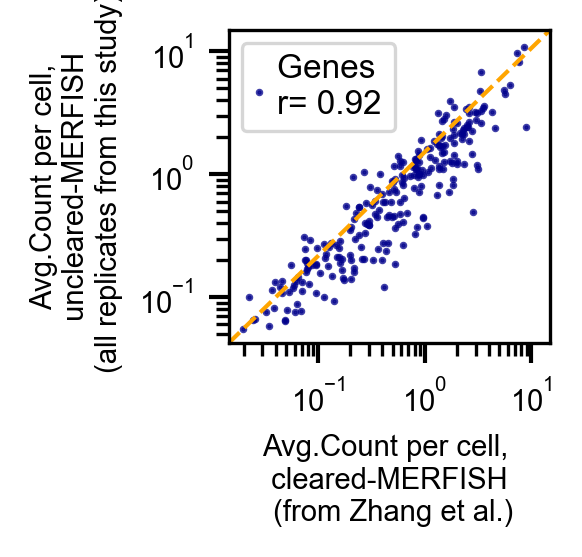

In [13]:
mean_ref = np.mean(count_ref, axis=0)
mean_query = merged_adata.var['mean_counts']

# Regression and get correlation
from scipy import stats
from scipy.stats import linregress


xs = mean_ref
ys = mean_query

fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)

gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)


plt.xlabel('Avg.Count per cell, \n cleared-MERFISH \n (from Zhang et al.)',fontsize=_font_size)
plt.ylabel('Avg.Count per cell,\n uncleared-MERFISH \n (all replicates from this study)',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)

ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 
ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.grid(False)
plt.xlim([-1,15])
plt.ylim([-1,15])
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange", linewidth=1)

plt.savefig(os.path.join(output_figure_folder, f'MOp_RNA_correlation_with_cleared_MERFISH.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

## correlation between bulk RNAseq and uncleared

In [14]:
shared_genes = np.intersect1d(merged_adata.var.index, RNAseq.index)

mean_ref = RNAseq.loc[shared_genes]['average']
mean_query = merged_adata.var.loc[shared_genes]['mean_counts']

In [15]:
# number of genes that have zero count from bulk RNAseq
# remove them later to correlate at log scale
np.sum(mean_ref==0)

7

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\1194842264.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-1,200])
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\1194842264.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-1,12])
meta NOT subset; don't know how to subset; dropped


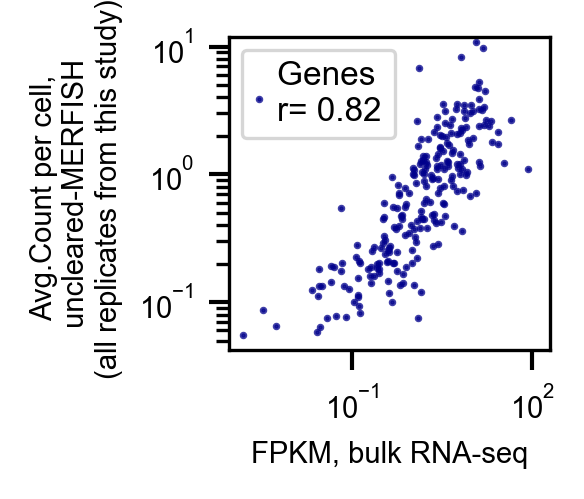

In [16]:
shared_genes = np.intersect1d(merged_adata.var.index, RNAseq.index)

mean_ref = RNAseq.loc[shared_genes]['average']
mean_query = merged_adata.var.loc[shared_genes]['mean_counts']

# Regression and get correlation
from scipy import stats
from scipy.stats import linregress

# remove genes that have zero count from bulk RNAseq
good_idx = mean_ref!=0
xs = mean_ref[good_idx]
ys = mean_query[good_idx]


fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)


gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)

plt.xlabel('FPKM, bulk RNA-seq',fontsize=_font_size)
plt.ylabel('Avg.Count per cell, \n uncleared-MERFISH \n (all replicates from this study)',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)


ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 

ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.grid(False)
plt.xlim([-1,200])
plt.ylim([-1,12])
#diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange", linewidth=1)

plt.savefig(os.path.join(output_figure_folder, f'MOp_RNA_correlation_with_bulk_RNAseq_zero_removed.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

## correlation between replicate

In [17]:
np.unique(merged_adata.obs['experiment'].tolist())

array(['20220304', '20220329', '20220415', '20220418'], dtype='<U8')

In [18]:
for _id in np.unique(merged_adata.obs['experiment'].tolist()):
    print(len(merged_adata.obs[merged_adata.obs['experiment']==_id]))

17856
13383
16760
14733


In [19]:
# use original counts (which has been normalized to the total)
adata = merged_adata.raw.to_adata()
adata.X.shape
adata.X.sum(axis=1)

array([200.     , 200.     , 200.00002, ..., 200.     , 200.     ,
       200.00002], dtype=float32)

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\3625841067.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-1,12])
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_38796\3625841067.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-1,12])
meta NOT subset; don't know how to subset; dropped


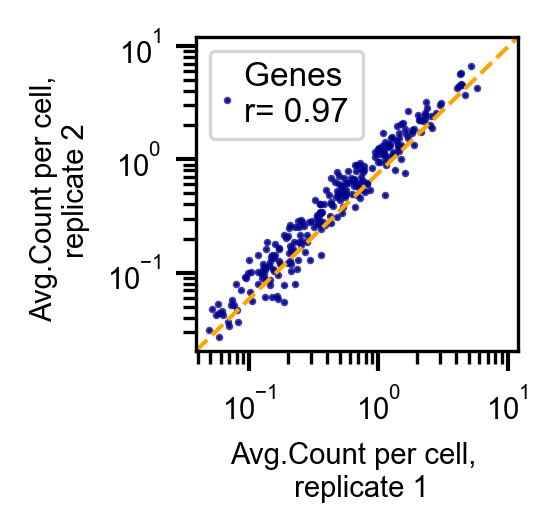

In [20]:
%matplotlib inline

exp_list = np.unique(merged_adata.obs['experiment'].tolist())

#from itertools import combinations
from scipy import stats
from scipy.stats import linregress

# use original counts (only normalized to the total)
adata = merged_adata.raw.to_adata()

# select two replicates
sel_exp_1 = '20220329'
sel_exp_2 = '20220415'
x_adata = adata[adata.obs['experiment']==sel_exp_1]
y_adata = adata[adata.obs['experiment']==sel_exp_2]
# quick re-calculate the mean
xs_raw = np.nanmean(x_adata.X, axis=0)
ys_raw = np.nanmean(y_adata.X, axis=0)
xs_ind =xs_raw>0
ys_ind =ys_raw>0
xs = xs_raw[xs_ind*ys_ind]
ys = ys_raw[xs_ind*ys_ind]

fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2,)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)


gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)


plt.xlabel('Avg.Count per cell, \n replicate 1',fontsize=_font_size)
plt.ylabel('Avg.Count per cell, \n replicate 2',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)


ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 


ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.grid(False)
plt.xlim([-1,12])
plt.ylim([-1,12])
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange", linewidth=1)

plt.savefig(os.path.join(output_figure_folder, f'MOp_RNA_correlation_between_norm_replicates.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')